In [1]:
from recast.CPT import CPT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd

# Croatian site 

In [2]:
# Sibenik
layout = CPT()
layout.MESH_EXTENT = 3500
layout.AVERAGE_RANGE = 4000
layout.LANDCOVER_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif'
layout.OUTPUT_DATA_PATH = '/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/output/'
layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 7
points = np.array([
[576697.34, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])





# layout.add_measurements(measurements = np.array([[579246, 4843915, 410 + 80]]), points_type = 'initial')
layout.add_measurement_instances(points = points, points_type = 'misc')

Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Measurement points 'misc' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).


In [3]:
layout.measurements_selector

'misc'

In [4]:
layout.optimize_measurements()

Correct latitudinal zone!
Correct longitudinal zone!
Optimizing misc measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Measurement points 'optimized' added to the measurements dictionary!
Measurements dictionary contains 2 different measurement type(s).


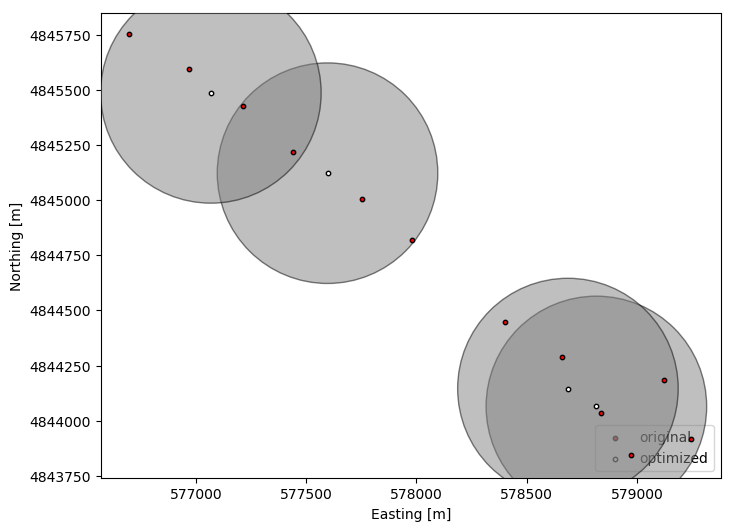

In [5]:
layout.plot_optimization(points_type = 'misc')

In [8]:
layout.generate_combined_layer(points_type = 'misc')

Generating combined layer for misc measurement points!
Topography layer generated using orography and canopy height.
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


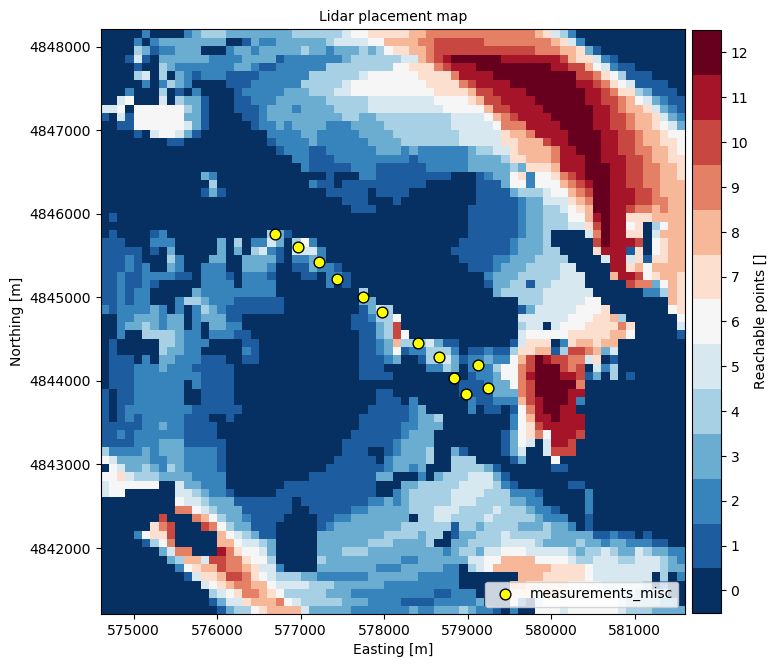

In [9]:
layout.plot_layer(layout.layer_selector('combined'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [ ]:
def plot_layer(self, layer, **kwargs):
    """
    Plots individual GIS layers.

    Parameters
    ----------
    layer : ndarray
        nD array containing data with `float` or `int` type 
        corresponding to a specific GIS layer.
    **kwargs : see below

    Keyword Arguments
    -----------------
    title : str
        The plot title.
    legend_label : str
        The legend label indicating what parameter is plotted.
    levels : ndarray
        Predetermined levels for the plotted parameter.
    save_plot : bool
        Indicating whether to save the plot as PDF.
    input_type : str


    Returns
    -------
    plot : matplotlib

    Examples
    --------
    >>> layout.plot_GIS_layer(layout.orography_layer, levels = np.array(range(0,510,10)), title = 'Orography', legend_label = 'Height asl [m]' , save_plot = True)

    """
    if 'levels' in kwargs:
        levels = kwargs['levels']
    else:
        levels = np.linspace(np.min(layer), np.max(layer), 20)

    if len(layer.shape) > 2:
        levels = np.array(range(-1,layer.shape[-1] + 1, 1))
        layer = np.sum(layer, axis = 2)

    fig, ax = plt.subplots(sharey = True, figsize=(800/self.MY_DPI, 800/self.MY_DPI), dpi=self.MY_DPI)
    cmap = plt.cm.RdBu_r
    cs = plt.pcolormesh(self.x, self.y, layer, cmap=cmap, alpha = 1)


    cbar = plt.colorbar(cs,orientation='vertical', ticks=levels, boundaries=levels,fraction=0.047, pad=0.01)
    if 'legend_label' in kwargs:
        cbar.set_label(kwargs['legend_label'], fontsize = self.FONT_SIZE)
        
    
    if 'points_type' in kwargs and kwargs['points_type'] in self.POINTS_TYPE:
        measurement_pts = self.measurement_type_selector(kwargs['points_type'])
    else:
        measurement_pts = self.measurement_type_selector(self.measurements_selector)        

    if measurement_pts is not None:
        for i, pts in enumerate(measurement_pts):
            if i == 0:
                ax.scatter(pts[0], pts[1], marker='o', 
                facecolors='yellow', edgecolors='black', 
                s=80,zorder=1500, label = 'measurements_' + self.measurements_selector)                    
            else:
                ax.scatter(pts[0], pts[1], marker='o',
                facecolors='yellow', edgecolors='black', 
                s=80,zorder=1500)

    if self.reachable_points is not None:
        visible_points = measurement_pts[np.where(self.reachable_points>0)]
        for i in range(0,len(visible_points)):
            if i == 0:
                ax.scatter(visible_points[i][0], visible_points[i][1], 
                        marker='+', color='black', s=80,zorder=2000, label = "reachable")
            else:
                ax.scatter(visible_points[i][0], visible_points[i][1], 
                        marker='+', color='black', s=80,zorder=2000)

    plt.xlabel('Easting [m]', fontsize = self.FONT_SIZE)
    plt.ylabel('Northing [m]', fontsize = self.FONT_SIZE)

    if 'title' in kwargs:
        plt.title(kwargs['title'], fontsize = self.FONT_SIZE)

    ax.set_aspect(1.0)

    if len(self.lidar_dictionary) > 0:
        for i, lidar in enumerate(self.lidar_dictionary):
            lidar_pos = self.lidar_dictionary[lidar]['position']
            ax.scatter(lidar_pos[0], lidar_pos[1], 
                       marker='s', 
                       facecolors=self.COLOR_LIST[i], edgecolors='white',linewidth='2',
                       s=100, zorder=2000, label = 'lidar: ' + lidar)

    if self.lidar_pos_1 is not None or self.lidar_pos_2 is not None or measurement_pts is not None:
        ax.legend(loc='lower right', fontsize = self.FONT_SIZE)    


    
    plt.show()

    if 'title' in kwargs and 'save_plot' in kwargs and kwargs['save_plot']:
            fig.savefig(self.OUTPUT_DATA_PATH + kwargs['title'] + '.pdf', bbox_inches='tight')

In [ ]:
layout.NO_DIGITS = 2
layout.add_lidar_instance(position = np.array([580600,4845700,100]), lidar_id = 'koshava')
layout.add_lidar_instance(position = np.array([580600 - 1000,4845700 - 2000,100]), lidar_id = 'whittle')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 - 2000,100]), lidar_id = 'sirocco')
layout.add_lidar_instance(position = np.array([580600 - 4000,4845700 +2000,100]), lidar_id = 'sterenn')
layout.update_lidar_instance(lidar_id = 'koshava')
layout.update_lidar_instance(lidar_id = 'sterenn')

plot_layer(layout, 
           layout.layer_selector('combined'), 
           title = 'Lidar placement map',
           legend_label = 'Reachable points []')

In [ ]:
layout.lidar_dictionary['koshava']['probing_coordinates']

In [ ]:
layout.lidar_dictionary['koshava']['motion_config']

In [ ]:
layout.lidar_dictionary['sterenn']['motion_config'].values[:,1:]

In [ ]:
len(points.shape)

In [ ]:
points.shape

In [ ]:
def array_difference(A,B):
    """
    Finding which elements in array A are not present in array B. 

    Parameters
    ----------
    A : ndarray
        nD array containing data with `float` or `int` type
    B : ndarray
        nD array containing data with `float` or `int` type

    Returns
    -------
    out : ndarray
        nD array containing data with 'float' or 'int' type
    
    Examples
    --------
    >>> A = np.array([[1,2,3],[1,1,1]])
    >>> B = np.array([[3,3,3],[3,2,3],[1,1,1]])
    >>> array_difference(A, B)
    array([[1, 2, 3]])

    >>> A = np.array([[1,2,3],[1,1,1]])
    >>> B = np.array([[1,2,3],[3,3,3],[3,2,3],[1,1,1]])
    >>> array_difference(A,B)
    array([], dtype=float64)
    """

    nrows, ncols = A.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],
           'formats':ncols * [A.dtype]}

    C = np.intersect1d(A.view(dtype), B.view(dtype))
    if len(C)==0:
        return A

    D = np.setdiff1d(A.view(dtype), B.view(dtype))

    # This last bit is optional if you're okay with "C" being a structured array...
    # C = C.view(A.dtype).reshape(-1, ncols)
    if len(D) == 0:
        return np.array([])

    D = D.view(A.dtype).reshape(-1, ncols)
    return D